In [1]:
from cell_cycle_gating import run_cell_cycle_gating as rccg
import pandas as pd
from cell_cycle_gating.plotting import *
%load_ext autoreload
%autoreload 2

In [2]:
# Name of object level directory
obj = 'EX_01[78956]'

# Load metadata file (OPTIONAL)
dfm = pd.read_csv('EX_01_metadata.csv')

# Map user defined channel names to standarized names required by the script
ndict = {'Nuclei Selected - EdUINT': 'edu',
        'Nuclei Selected - DNAcontent': 'dna',
        'Nuclei Selected - LDRTXT SER Spot 8 px' : 'ldr',
        'Nuclei Selected - pH3INT': 'ph3'}

In [3]:
dfs = rccg.run(obj, ndict, dfm)

d:\dropbox (personal)\scripts\python codes\drugresponse\python\cell_cycle_gating\cellcycle_phases.py:279: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  z = np.linalg.lstsq((e + p), y)


Completed analysis for 10 out of 10 wells


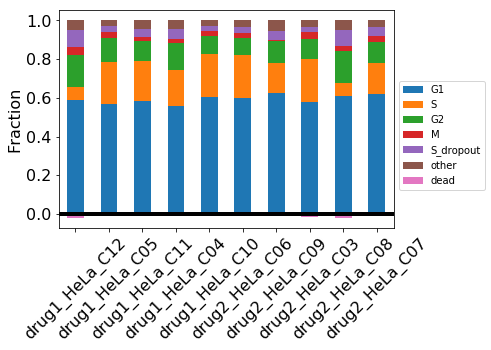

In [29]:
dfs['dead'] = -dfs.cell_count__dead/dfs.cell_count__total
plot_stacked_bar(dfs,data_cols=['G1', 'S', 'G2', 'M','S_dropout', 'other', 'dead'], figname=None)
plt.show()

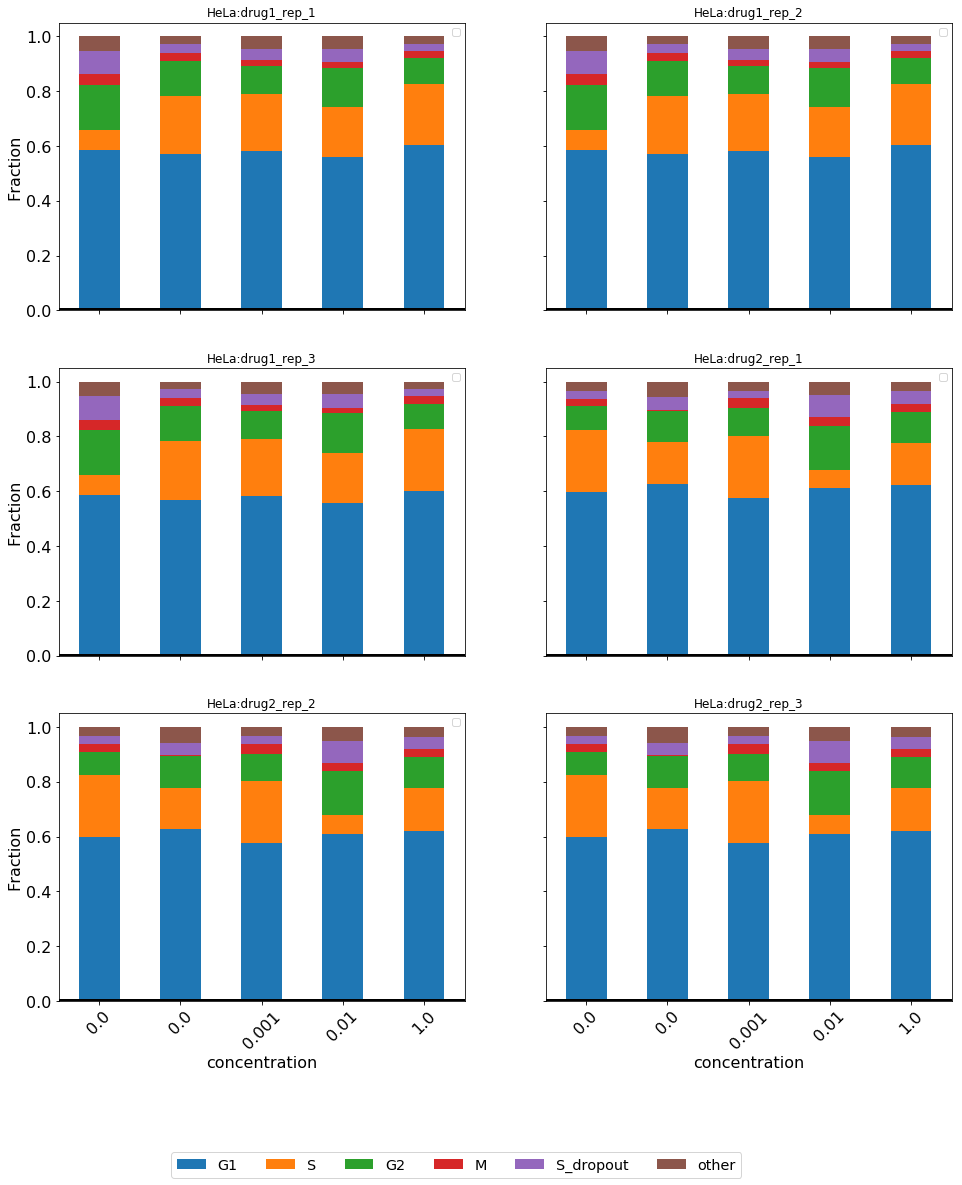

In [35]:
fake_data = pd.DataFrame()
for i in range(3):
    df = dfs.copy()
    df.agent = df.agent.apply(lambda x: x + '_rep_' + str(i+1))
    fake_data = fake_data.append(df)
batch_stacked_bar_plot(fake_data,data_cols = ['G1', 'S', 'G2', 'M', 'S_dropout', 'other'], row_by='cell_line',col_by='agent')

## Row by agent and col by cell line

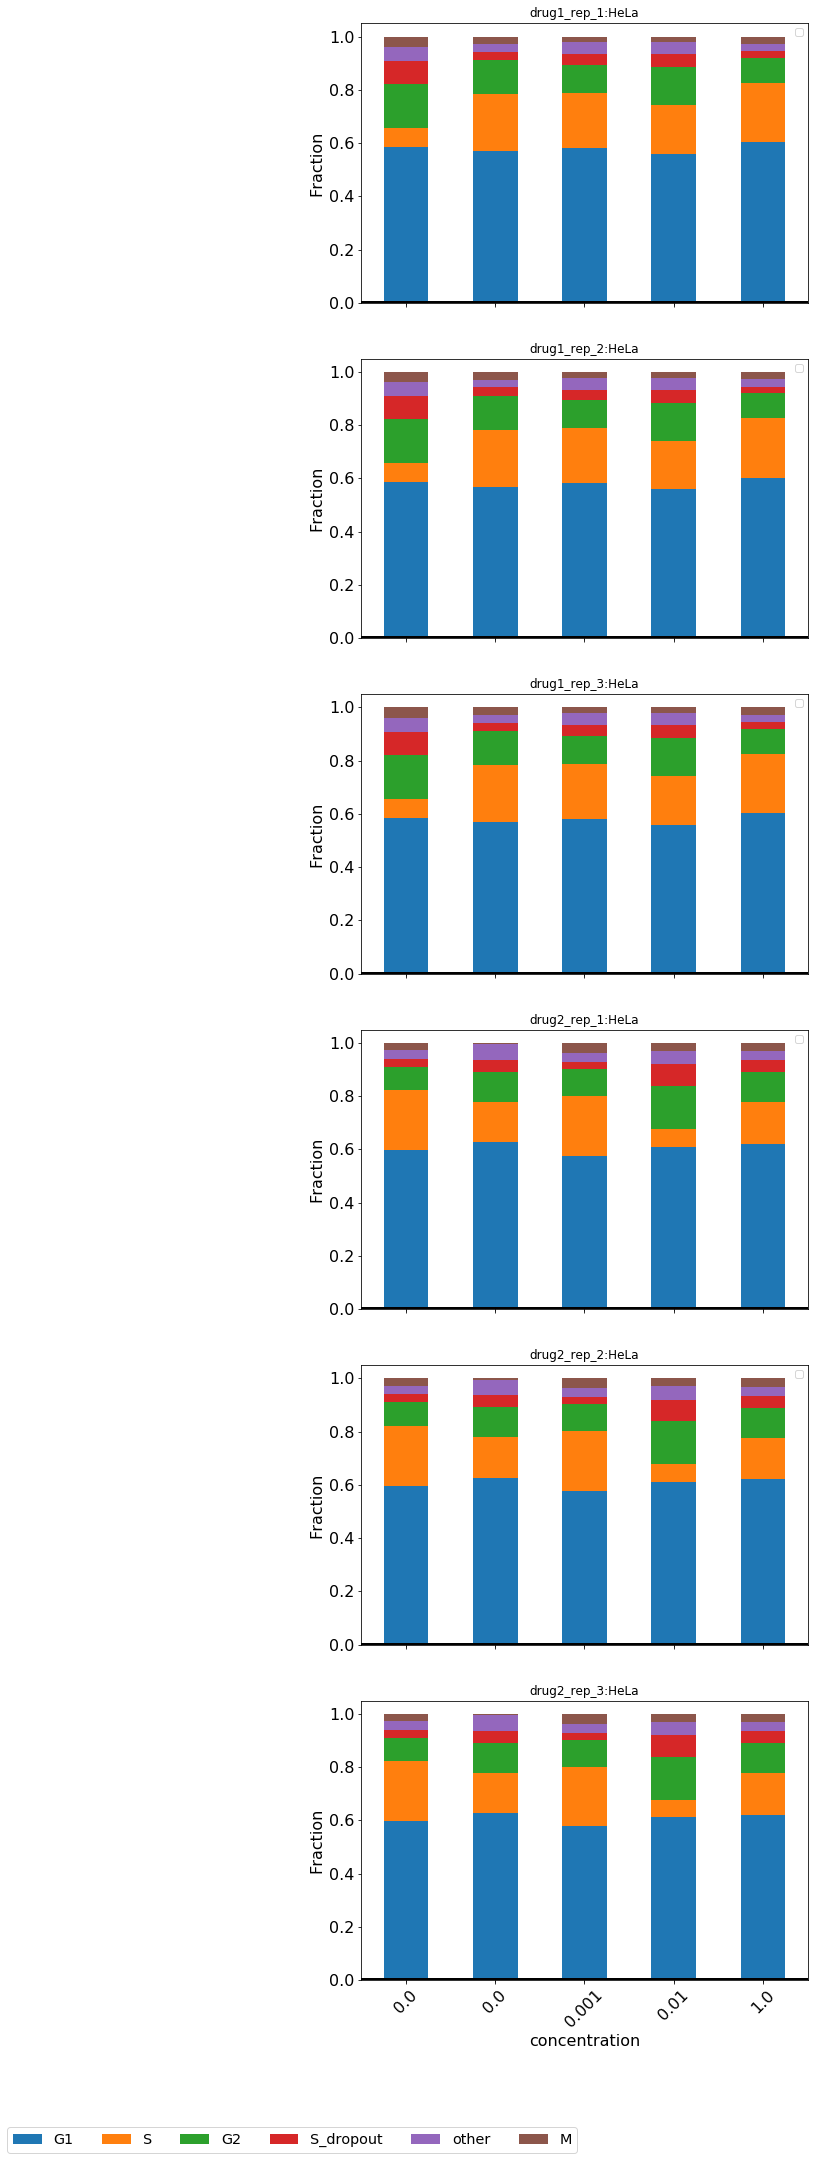

In [34]:
batch_stacked_bar_plot(fake_data,row_by='agent',col_by='cell_line')

In [250]:
import numpy as np
data = pd.DataFrame()
j=0
for i in range(5):
    m1 = np.random.normal(size=10000)
    m2 = np.random.normal(loc = 5+j, scale = 0.5, size=10000)
    data = pd.concat([data, pd.Series(np.hstack([m1,m2]), name='sample_'+str(i+1))], axis = 1)
    j+=1

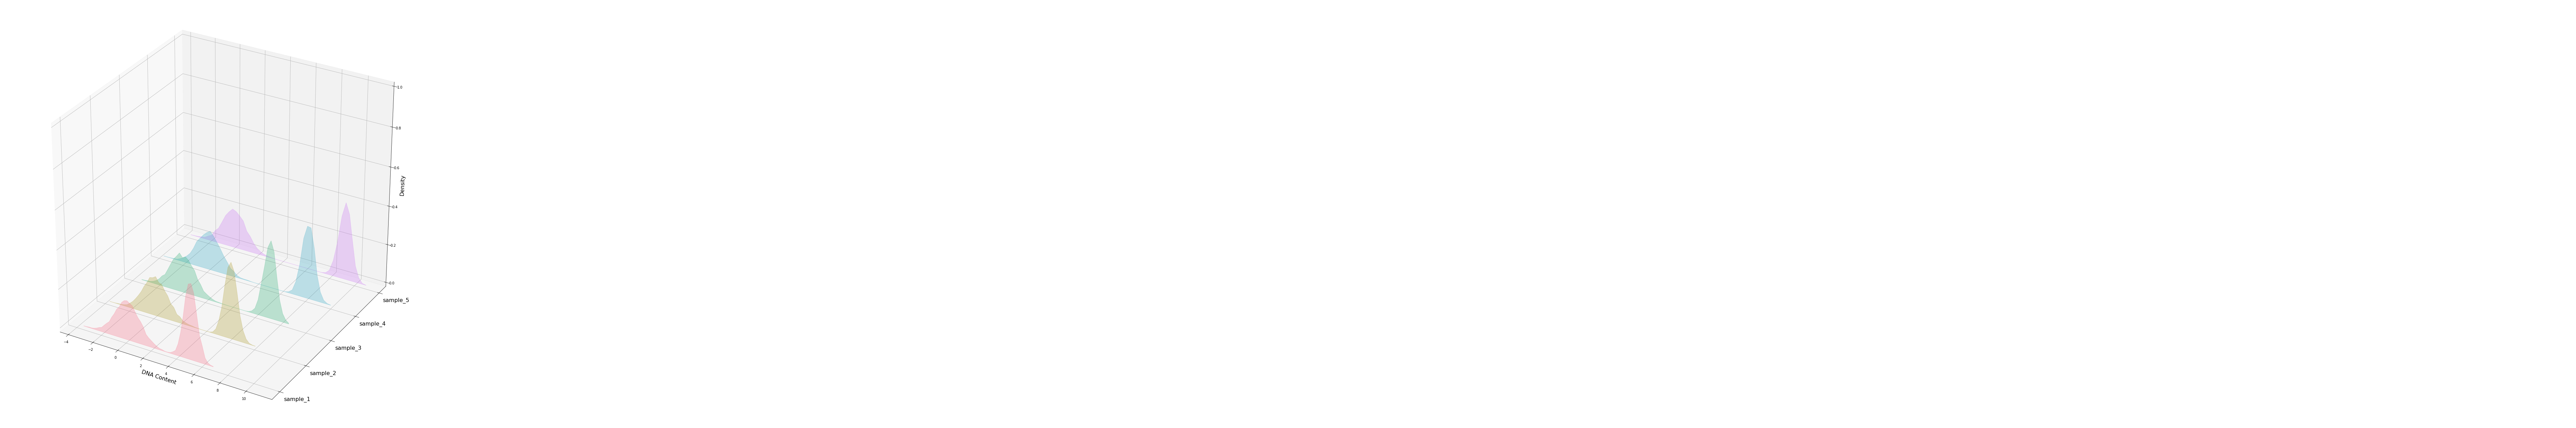

In [251]:
g = group_hist3d(data,figsize=(22.5,22.5))

In [100]:
import os
data_path = os.path.join('Z:\sorger\data\Operetta\Caitlin\DeepDyeDrop\CDK7_01[6108]')
metadata_fn = os.path.join(data_path,'CDK7Hap1_dfm.csv')
metadata = pd.read_csv(metadata_fn,index_col=0)

In [297]:
p=data_processing_stacked_hist3d(metadata,data_path, agents=['CDK7C YKL-5-124'], doses=['0.3','0.6','1'], cells=['HAP1 WT'])

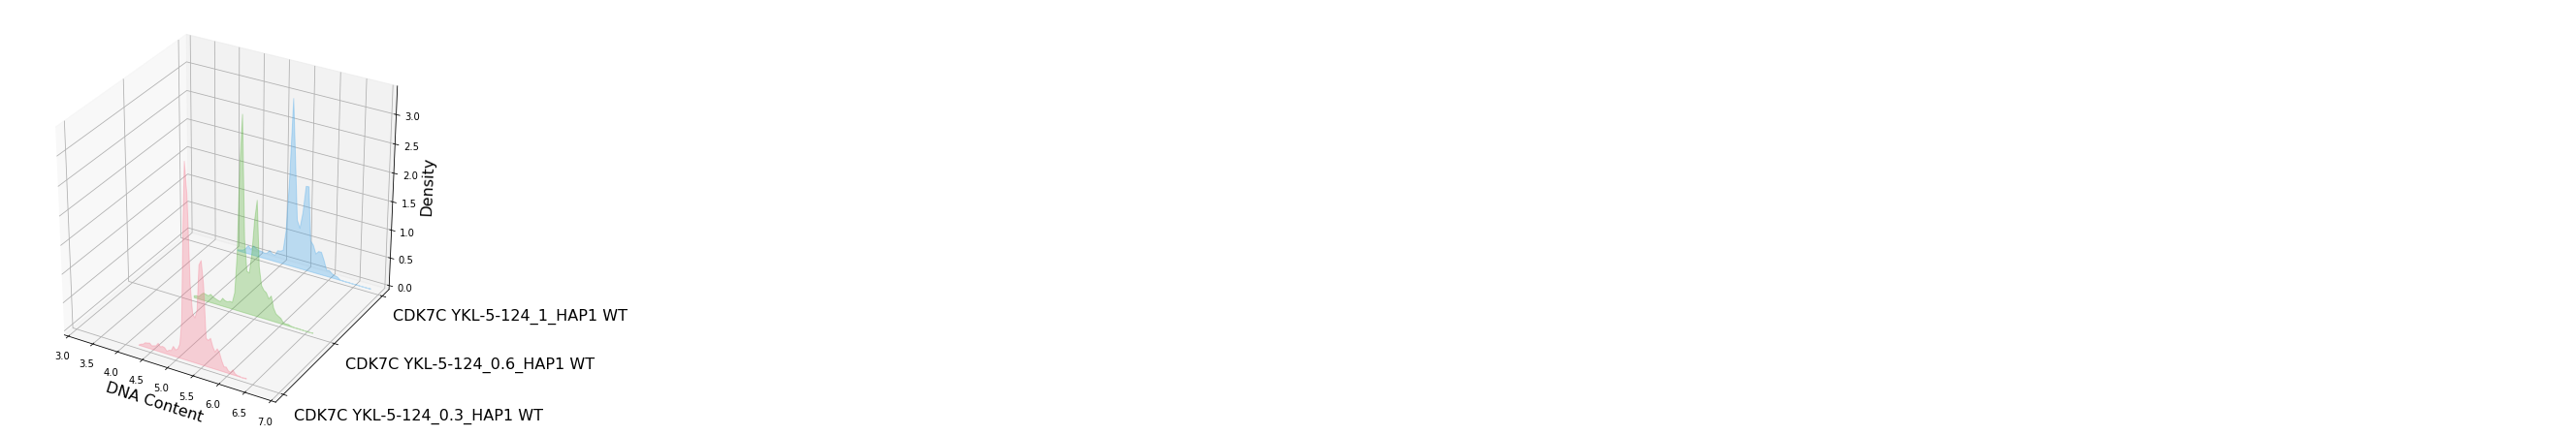

In [299]:
g = stacked_hist3d(p)